In [1]:
from lib.Environment import DeepTradingEnvironment
import datetime 
# parameters related to the transformation of data, this parameters govern an step before the algorithm
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window": datetime.timedelta(minutes=10),
                   "state_type":"in_window_out_window"}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001}
print("===Meta Parameters===")
print(meta_parameters)
print("===Objective Parameters===")
print(objective_parameters)



===Meta Parameters===
{'in_bars_count': 30, 'out_reward_window': datetime.timedelta(seconds=600), 'state_type': 'in_window_out_window'}
===Objective Parameters===
{'percent_commission': 0.001}


(<matplotlib.axes._subplots.AxesSubplot at 0x7fed780b4690>,)

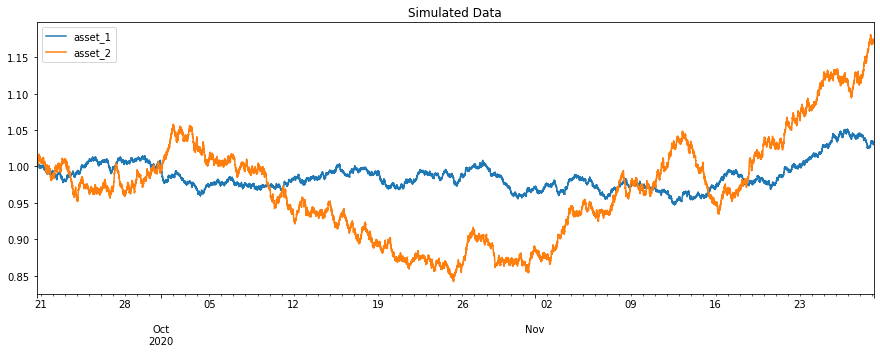

In [2]:

assets_simulation_details={"asset_1":{"method":"GBM","sigma":.1,"mean":.1},
                    "asset_2":{"method":"GBM","sigma":.2,"mean":.2}}

env_2=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,data_hash="simulation_gbm",
                                                                     meta_parameters=meta_parameters,objective_parameters=objective_parameters)

env_2.assets_prices.plot(figsize=(15,5),title="Simulated Data"),

In [3]:
test_data=env_2.assets_prices.copy()
test_data

,asset_1,asset_2
2020-09-20 16:00:00,0.999698,1.000447
2020-09-20 16:05:00,1.000048,1.000441
2020-09-20 16:10:00,1.000177,0.999953
2020-09-20 16:15:00,0.999882,1.000509
2020-09-20 16:20:00,1.000213,0.999051
...,...,...
2020-11-29 02:20:00,1.030593,1.174243
2020-11-29 02:25:00,1.030686,1.172391
2020-11-29 02:30:00,1.030773,1.172772
2020-11-29 02:35:00,1.029768,1.172742


In [4]:
from lib.DataHandling import DailyDataFrame2Features

data_handler=DailyDataFrame2Features(test_data,configuration_dict={},
                                     forward_returns_time_delta=[datetime.timedelta(minutes=10),
                                                                datetime.timedelta(minutes=30)])


In [5]:
data_handler.all_features

,asset_1_100_days_ma,asset_1_12m1_past_return,asset_1_1_day_forward_return,asset_1_1_week_forward_return,asset_1_1m_past_return,asset_1_200_days_ma,asset_1_3m_past_return,asset_1_50_days_ma,asset_1_bollinger_up,asset_1_bollinger_mid,...,asset_2_50_days_ma,asset_2_bollinger_up,asset_2_bollinger_mid,asset_2_bollinger_low,asset_2_ewma_vol,asset_2_fraction_diff,asset_2_log_returns,asset_2_rsi,asset_2_0:10:00,asset_2_0:30:00
2020-09-20 16:00:00,NaN,NaN,-0.005913,0.009977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000494,-0.001945
2020-09-20 16:05:00,NaN,NaN,-0.005982,0.009551,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000069,NaN,-0.000006,NaN,0.000068,-0.001336
2020-09-20 16:10:00,NaN,NaN,-0.006251,0.008521,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.005476,NaN,-0.000488,NaN,-0.000902,-0.001006
2020-09-20 16:15:00,NaN,NaN,-0.006809,0.008903,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.006179,NaN,0.000556,NaN,-0.001258,-0.001142
2020-09-20 16:20:00,NaN,NaN,-0.006991,0.008536,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.016267,NaN,-0.001459,NaN,-0.000550,0.000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29 02:20:00,1.000588,NaN,NaN,NaN,0.070285,1.000119,NaN,1.002581,1.035524,1.032701,...,0.997304,1.175868,1.171782,1.167696,0.004257,0.317568,0.000326,57.907669,-0.001252,NaN
2020-11-29 02:25:00,1.000533,NaN,NaN,NaN,0.071516,0.999995,NaN,1.002414,1.035404,1.032535,...,0.998870,1.175888,1.171915,1.167943,0.020707,0.315607,-0.001578,50.568422,0.000299,NaN
2020-11-29 02:30:00,1.000486,NaN,NaN,NaN,0.071272,0.999876,NaN,1.002255,1.035250,1.032377,...,0.998549,1.175883,1.172084,1.168286,0.004849,0.316378,0.000325,51.919492,-0.000701,NaN
2020-11-29 02:35:00,1.001489,NaN,NaN,NaN,0.071512,1.000811,NaN,1.003147,1.035096,1.032159,...,0.998588,1.175898,1.172220,1.168541,0.000734,0.316382,-0.000026,51.799023,NaN,NaN
